# Data understanding
For understanding the dataset we follow some precise steps:
- Collecting the data
- Describe the data
- Do an exploration of this data
- And finally, some verifications

Before doing this, we will summarize the information we already have about this dataset.

Context and Origin
----
This dataset is a collection of medical records focused on the early detection of Chronic Kidney Disease (CKD) in an Indian population. It was compiled in July 2015 through a collaboration between the Department of Computer Science at Alagappa University and Apollo Hospitals in Tamil Nadu, India. The involvement of a Senior Consultant Nephrologist (Dr. P. Soundarapandian) suggests the data has strong clinical validity.

Dataset Structure & Target
----
It contains 400 patient instances. It is a **binary classification** problem. The target variable is `status`, identifying whether a patient has chronic kidney disease (CKD) or not.
Also, there is a moderate imbalance in the target classes; about 250 are CKD cases, while the rest are control ones.

Feature Space
----
The data is high-dimensional with **24 predictive attributes** (plus the target class). The features are a mix of data types:
- Numerical are 11 features: continuous variables including Age, Blood pressure, and various blood chemistry levels (as blood urea, hemoglobin, sodium, etc.)
- Categorical are 14 features: discrete categories including specific gravity, presence of Bacteria/Pus, symptoms as hypertension, diabetes, etc.


Data quality & Preprocessing Needs
----

The documentation explicitly flags that **missing values** are shown as '?'. So we will have to have this in consideration.

Also, we will need to homogenize the categorical features. Some of them are as 'Yes/No', others as 'Normal/Abnormal', ... So converting these categorical values to binary formats, for example, will be an important step. Furthermore, some nominal features as **specific gravity, albumin and sugar** behave like ordinal data because the order is important, so it is needed to preserve the order.



# Environment Setup & Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Visualization Config
plt.style.use('ggplot')
sns.set_context('notebook')
pd.set_option('display.max_columns', None)

# Path Config
DATA_PATH = Path('../../data/raw/chronic_kindey_disease.csv')


# Phase 1: Data loading
Before analyzing what the data says, we must verify what the data is. So, we load raw data and defining custom null identifiers.

In [10]:
try:
    # '?' is defined as the null placeholder in the documentation
    df = pd.read_csv(DATA_PATH, na_values='?', skipinitialspace=True)
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}")

# Quick sanity check
df.head()

Data loaded successfully. Shape: (400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Phase 2: Data Structure

In [14]:
# Data Shape
print(f"Data Dimension: {df.shape[0]} rows, {df.shape[1]} columns")

# Data Types and Schema
df.info()

# Preview Data
df.head()

Data Dimension: 400 rows, 25 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  ap

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Observations:
----
- Dimensions: 400 instances, 25 attributes.
- Types: The dataset contains a mix of numerical (float64) and categorical (object) features.

# Phase 3: Data cleaning a little bit

In [15]:
# Check for unique values in categorical columns to spot dirty data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")



rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' '\tno' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
status: ['ckd' 'ckd\t' 'notckd']


In [16]:
# Cleaning: Removing potential whitespace (e.g., '\tno', ' yes')
# We found specific issues in 'dm', 'cad', and 'status' columns
cols_to_clean = ['dm', 'status']

def clean_text(x):
    if isinstance(x, str):
        return x.strip().lower()
    return x

for col in cols_to_clean:
    df[col] = df[col].apply(clean_text)

# Verify Cleaning
print("\n--- Post-Cleaning Unique Values ---")
print(f"Status: {df['status'].unique()}")


--- Post-Cleaning Unique Values ---
Status: ['ckd' 'notckd']


**Corretion**
- Fixed `dm` which contained `\tno`
- Fixed `status` which contained `ckd\t`

# Phase 4: Analysing missing values

       Total  Percent
rbc      152    38.00
rbcc     131    32.75
wbcc     106    26.50
pot       88    22.00
sod       87    21.75
pcv       71    17.75
pc        65    16.25
hemo      52    13.00
su        49    12.25
sg        47    11.75
al        46    11.50
bgr       44    11.00
bu        19     4.75
sc        17     4.25
bp        12     3.00
age        9     2.25
pcc        4     1.00
ba         4     1.00
htn        2     0.50
dm         2     0.50
cad        2     0.50
appet      1     0.25
pe         1     0.25
ane        1     0.25


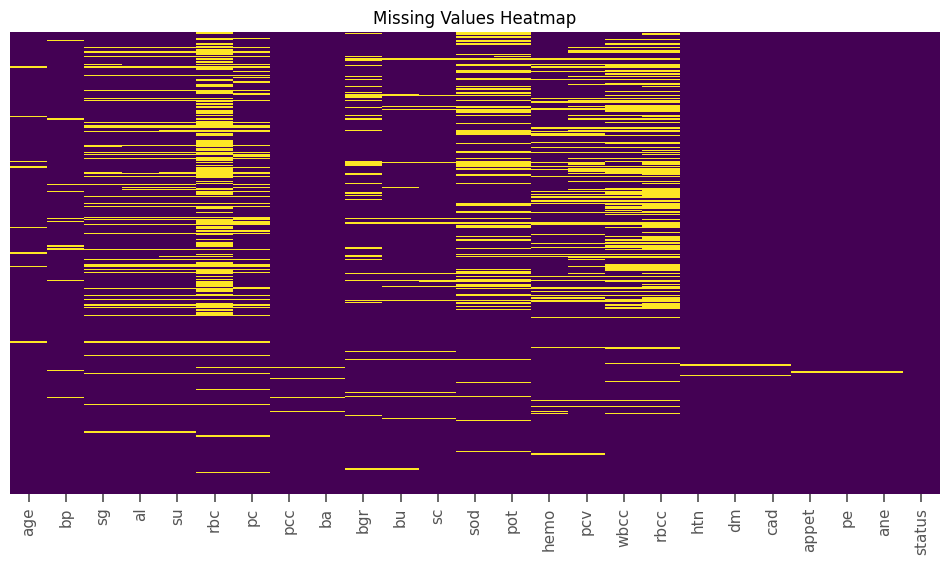

In [17]:
# Calculate missing values
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

# Visualizing Missing Data Pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

Some **observations**:
- The features *rbc* (Red Blood Cells) and *rbcc* (Red blood cell count) have significant missing data.
- The heatmap suggests that missing values often occur across multiple columns for the same patients.

# Phase 5: Statistical Summary

In [21]:
# Numerical Summary
print(df.describe().T)

      count         mean          std       min      25%      50%      75%  \
age   391.0    51.483376    17.169714     2.000    42.00    55.00    64.50   
bp    388.0    76.469072    13.683637    50.000    70.00    80.00    80.00   
sg    353.0     1.017408     0.005717     1.005     1.01     1.02     1.02   
al    354.0     1.016949     1.352679     0.000     0.00     0.00     2.00   
su    351.0     0.450142     1.099191     0.000     0.00     0.00     0.00   
bgr   356.0   148.036517    79.281714    22.000    99.00   121.00   163.00   
bu    381.0    57.425722    50.503006     1.500    27.00    42.00    66.00   
sc    383.0     3.072454     5.741126     0.400     0.90     1.30     2.80   
sod   313.0   137.528754    10.408752     4.500   135.00   138.00   142.00   
pot   312.0     4.627244     3.193904     2.500     3.80     4.40     4.90   
hemo  348.0    12.526437     2.912587     3.100    10.30    12.65    15.00   
pcv   329.0    38.884498     8.990105     9.000    32.00    40.0

In [20]:
# Categorical Summary
print(df.describe(include=['object']).T)

       count unique         top freq
rbc      248      2      normal  201
pc       335      2      normal  259
pcc      396      2  notpresent  354
ba       396      2  notpresent  374
htn      398      2          no  251
dm       398      2          no  261
cad      398      2          no  364
appet    399      2        good  317
pe       399      2          no  323
ane      399      2          no  339
status   400      2         ckd  250


From these statistical summarizes we can deduce some important aspects.
For example: the *age* range from 2 to 90 years, with a mean of 51 years old, the *rbc* value tends to be normal, etc.

# Phase 6: Univariate Analysis
We will visualize the distribution of individual key variables

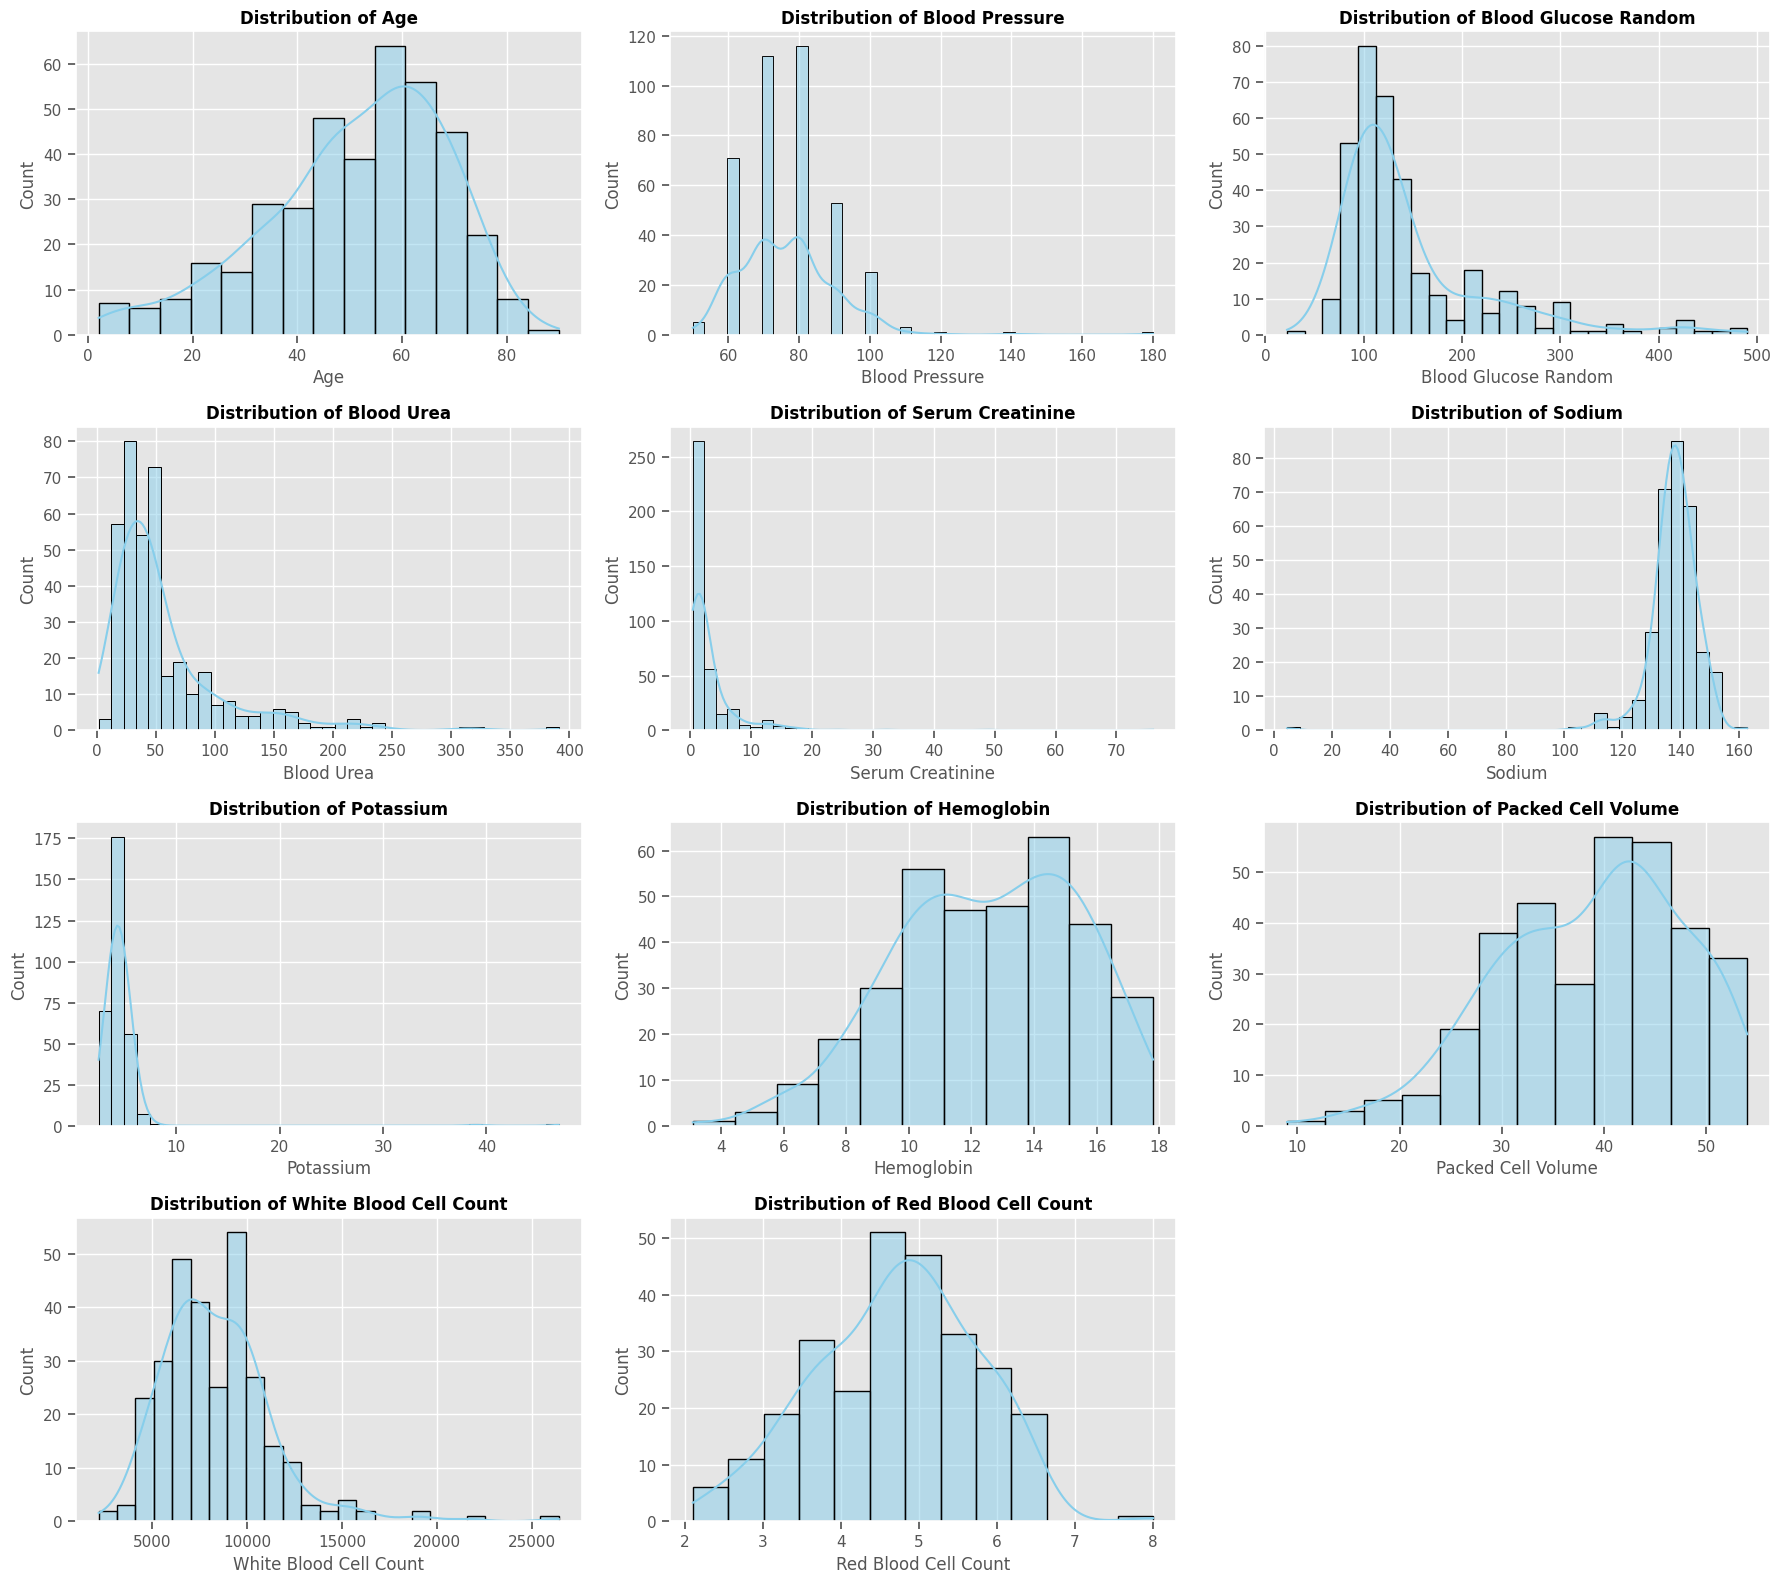

In [27]:
# Dictionary mapping column names to full names based on dataset documentation
numeric_cols_mapping = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count'
}

# Setup the plotting grid (4 rows x 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, (col, full_name) in enumerate(numeric_cols_mapping.items()):
    # Plot histogram with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue', edgecolor='black')

    # Set titles and labels using the full name
    axes[i].set_title(f'Distribution of {full_name}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(full_name)
    axes[i].set_ylabel('Count')

# Remove unused subplots
for j in range(len(numeric_cols_mapping), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


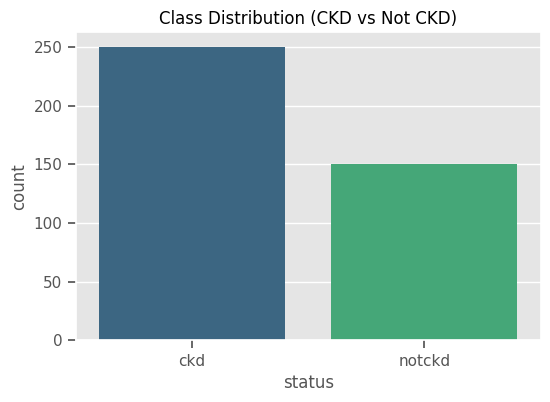

In [25]:
# Plotting Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df, palette='viridis', hue='status')
plt.title('Class Distribution (CKD vs Not CKD)')
plt.show()

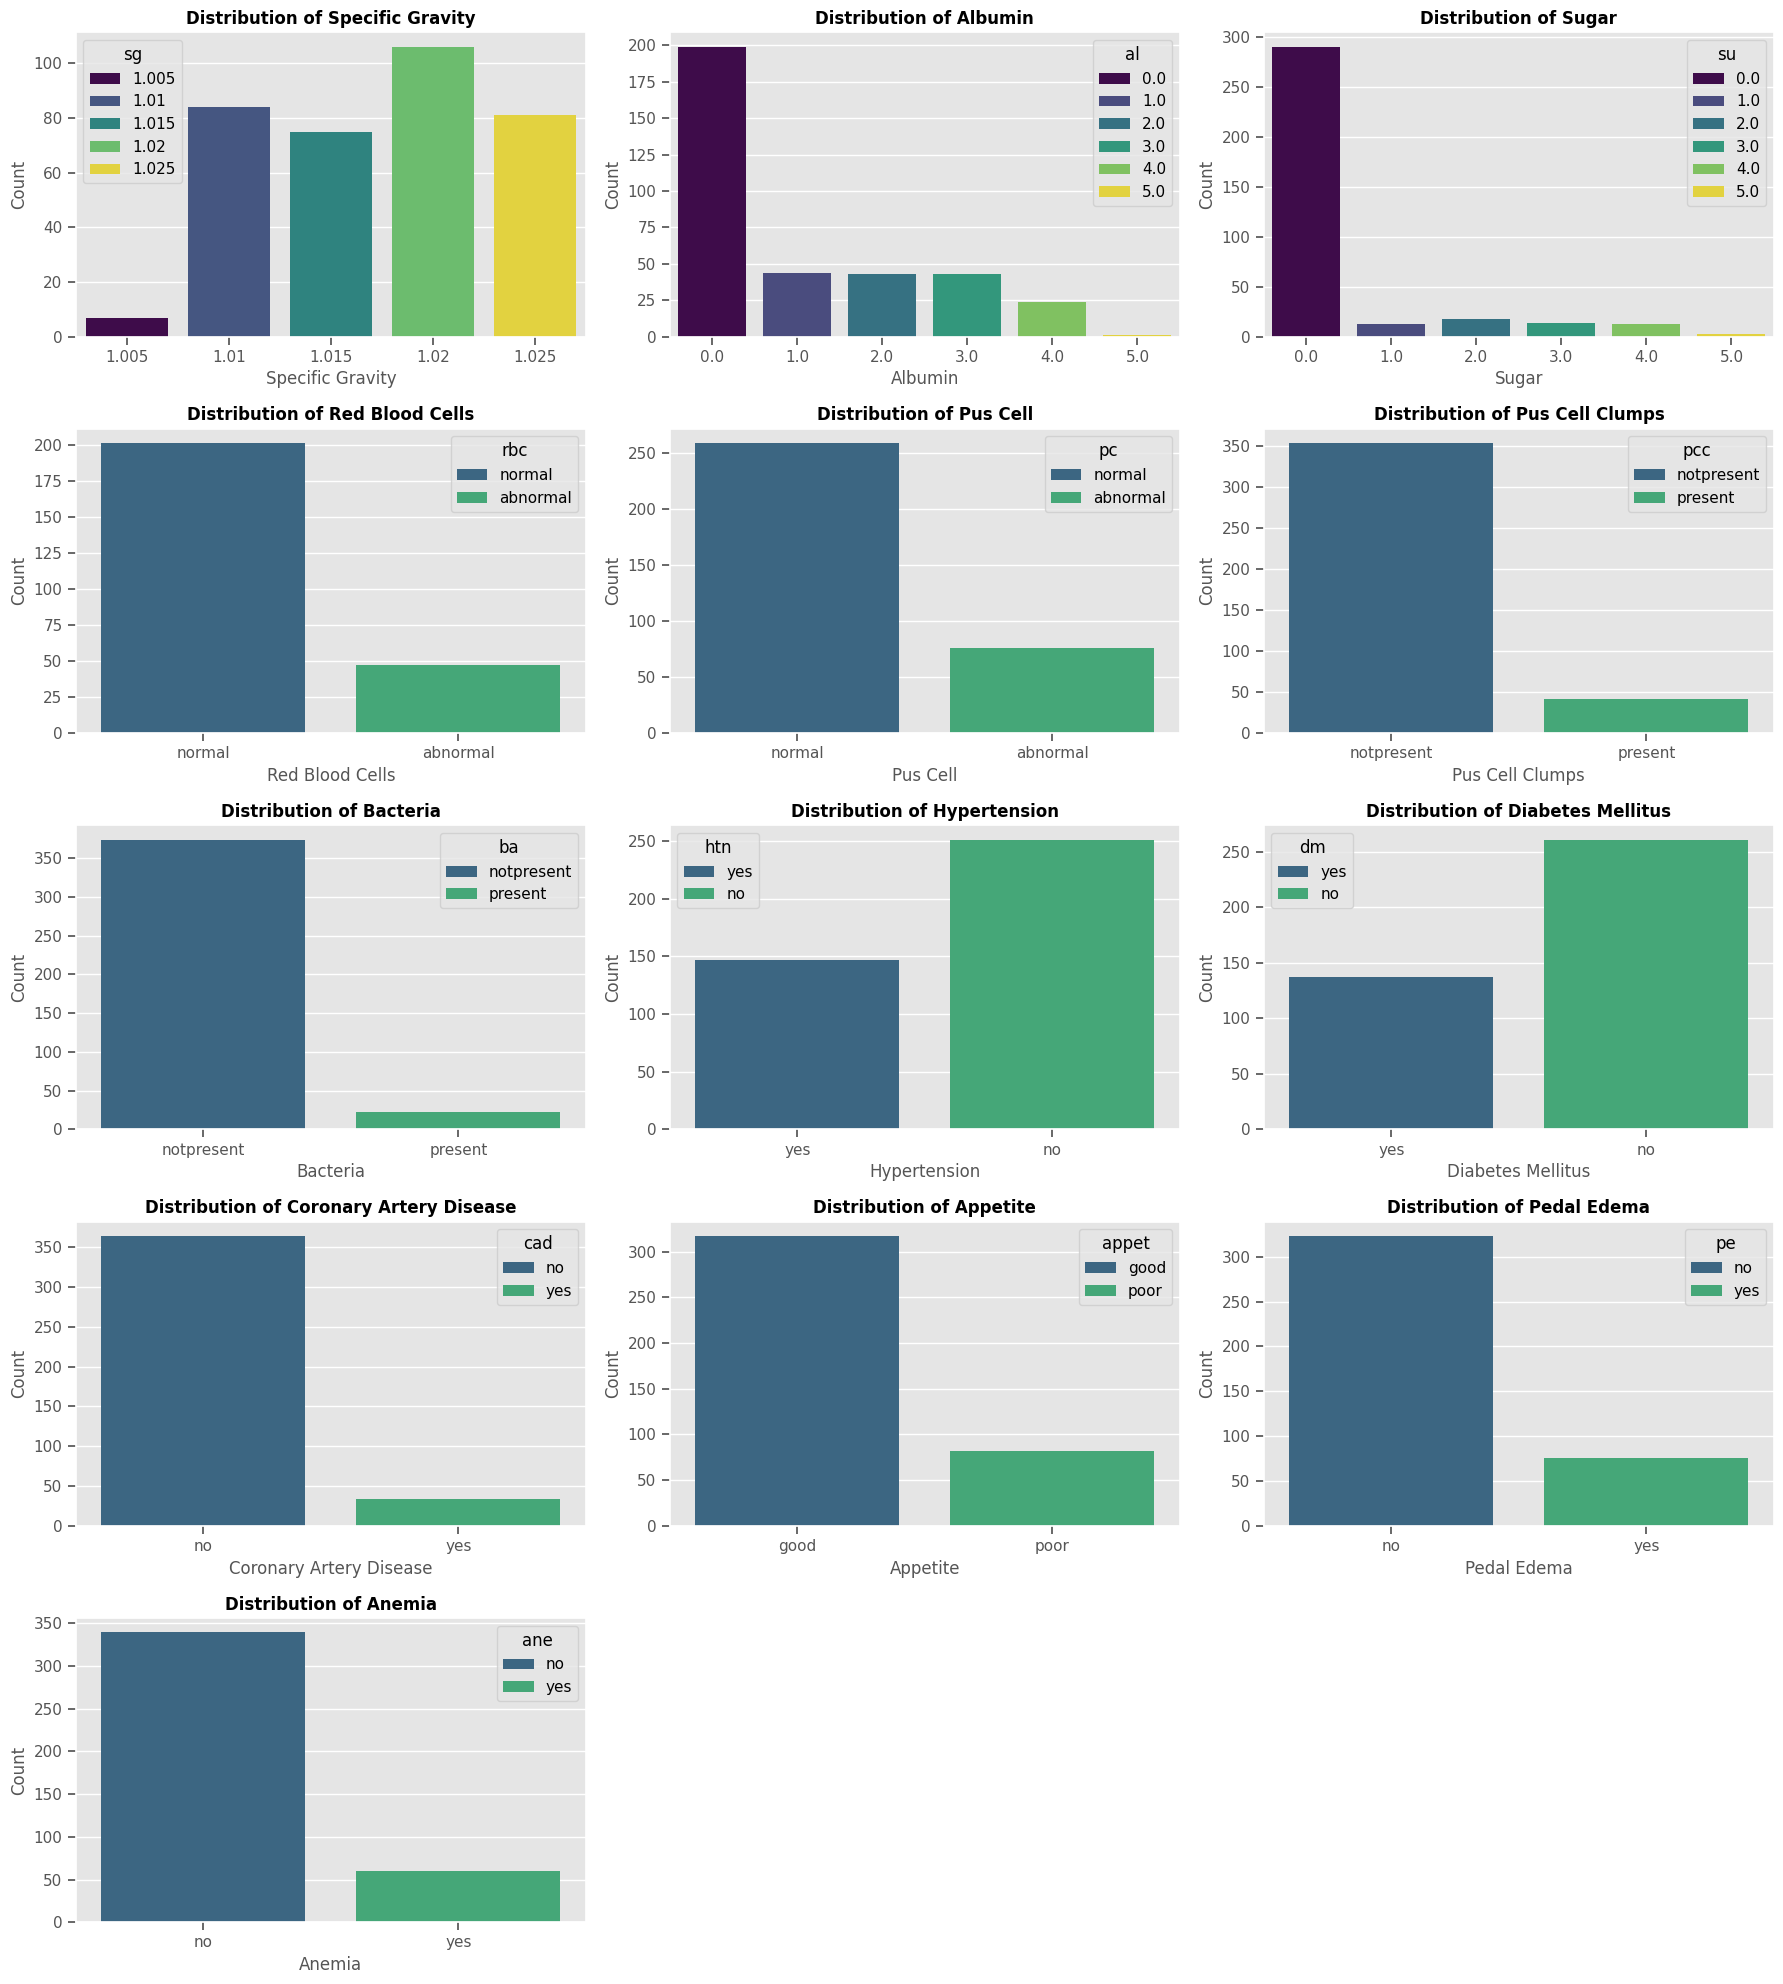

In [29]:
# Dictionary mapping categorical columns to full names
categorical_cols_mapping = {
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia'
}

# Setup the plotting grid (5 rows x 3 columns)
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for i, (col, full_name) in enumerate(categorical_cols_mapping.items()):
    # Sort order for ordinal variables (sg, al, su) to make the plot logical
    order = sorted(df[col].dropna().unique()) if col in ['sg', 'al', 'su'] else None

    # Create Count Plot
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=order, hue= col)

    # Styling
    axes[i].set_title(f'Distribution of {full_name}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(full_name)
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(categorical_cols_mapping), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Phase 7: Correlations

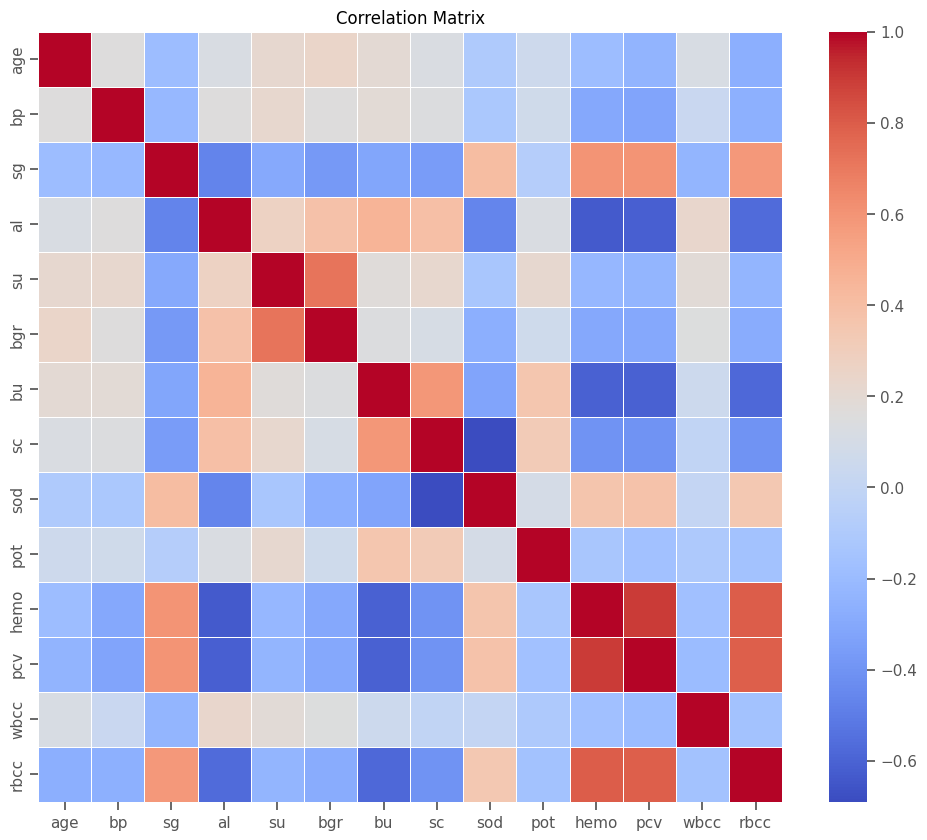

In [30]:
# Correlation Matrix
# Note: 'sg', 'al', 'su' are ordinal but encoded as float, so they appear here naturally.
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- *Hemoglobin (hemo)* and *PCV* have a strong positive correlation.
- *Serum Creatinine (sc)* and *Blood Urea (bu)* have a strong positive correlation too.
- *Specific Gravity (sg)* shows negative correlation with markers like *bu* and *sc*.